# TARGET vector

In [1]:
import pandas as pd

targets = pd.read_csv("subject-info.csv")

results = targets['Count quality']
print(results.values)

[0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1]


# FEATURES BEFORE vector

In [4]:
import pickle
import pandas as pd

# Load the sample entropy and correlation dimension from a pickle file
with open("sample_before_results.pkl", 'rb') as f:
    sample_before = pickle.load(f)

with open("correlation_dimension_before.pkl", 'rb') as f:
    correlation_before = pickle.load(f)


before_df = pd.read_csv("power_O2_before.csv")

# Create lists to store the characteristics of each individual
features = []

num_individuals = len(sample_before)

for i in range(num_individuals):
    # Create a dictionary to store the individual's features
    individual_features = {}
    
    individual_features['sample_entropy'] = sample_before[i]
    individual_features['correlation_dimension'] = correlation_before[i]
    
    delta_power = before_df[(before_df['Patient'] == (i + 1)) & (before_df['Band'] == 'delta')]['Power Before'].values
    theta_power = before_df[(before_df['Patient'] == (i + 1)) & (before_df['Band'] == 'theta')]['Power Before'].values
    alpha_power = before_df[(before_df['Patient'] == (i + 1)) & (before_df['Band'] == 'alpha')]['Power Before'].values
    beta_power = before_df[(before_df['Patient'] == (i + 1)) & (before_df['Band'] == 'beta')]['Power Before'].values
    gamma_power = before_df[(before_df['Patient'] == (i + 1)) & (before_df['Band'] == 'gamma')]['Power Before'].values

    individual_features['delta_power'] = delta_power[0]
    individual_features['theta_power'] = theta_power[0]
    individual_features['alpha_power'] = alpha_power[0]
    individual_features['beta_power'] = beta_power[0]
    individual_features['gamma_power'] = gamma_power[0]
    
    features.append(individual_features)

features_before = pd.DataFrame(features)
print(features_before.head())

   sample_entropy  correlation_dimension  delta_power  theta_power  \
0        0.528557               0.757331    16.539006     5.573255   
1        0.468592               0.450983    37.717432     7.058383   
2        0.501875               0.400095    33.920699     8.425827   
3        0.466064               0.733875    25.074880    12.086988   
4        0.426544               0.966698    40.950820    11.675281   

   alpha_power  beta_power  gamma_power  
0    67.085880   10.217711     0.584148  
1    36.201181   17.780124     1.242880  
2    42.682292   13.417670     1.553511  
3    51.306723   10.691358     0.840050  
4    35.221479   11.472998     0.679421  


# UMAP of features BEFORE

C:\Users\pablo\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


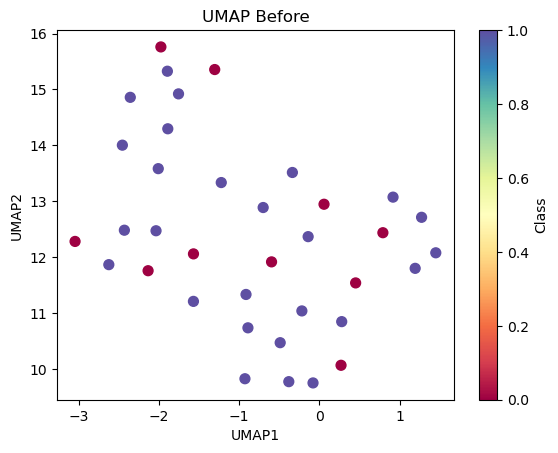

In [7]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = features_before.values
y = results

scaler = StandardScaler() 
X_normalized = scaler.fit_transform(X)

reducer = umap.UMAP(n_neighbors=9, min_dist=0.3,n_components=2, random_state=42)

# Fit and transform the data
X_umap = reducer.fit_transform(X_normalized)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=50)
plt.title('UMAP Before')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Class')
plt.savefig("UMAP_before.png", dpi=300)  # Save figure
plt.show()

## FEATURES BEFORE + GENDER vector

In [6]:
info = pd.read_csv("subject-info.csv")

info['Gender_encoded'] = info['Gender'].apply(lambda x: 1 if x == 'F' else 0)

new = info['Gender_encoded']

features_before_gender = pd.merge(features_before, new, left_index=True, right_index=True, how='left')

print(features_before_gender.head())

   sample_entropy  correlation_dimension  delta_power  theta_power  \
0        0.528557               0.757331    16.539006     5.573255   
1        0.468592               0.450983    37.717432     7.058383   
2        0.501875               0.400095    33.920699     8.425827   
3        0.466064               0.733875    25.074880    12.086988   
4        0.426544               0.966698    40.950820    11.675281   

   alpha_power  beta_power  gamma_power  Gender_encoded  
0    67.085880   10.217711     0.584148               1  
1    36.201181   17.780124     1.242880               1  
2    42.682292   13.417670     1.553511               1  
3    51.306723   10.691358     0.840050               1  
4    35.221479   11.472998     0.679421               1  


## Pairplot gender BEFORE

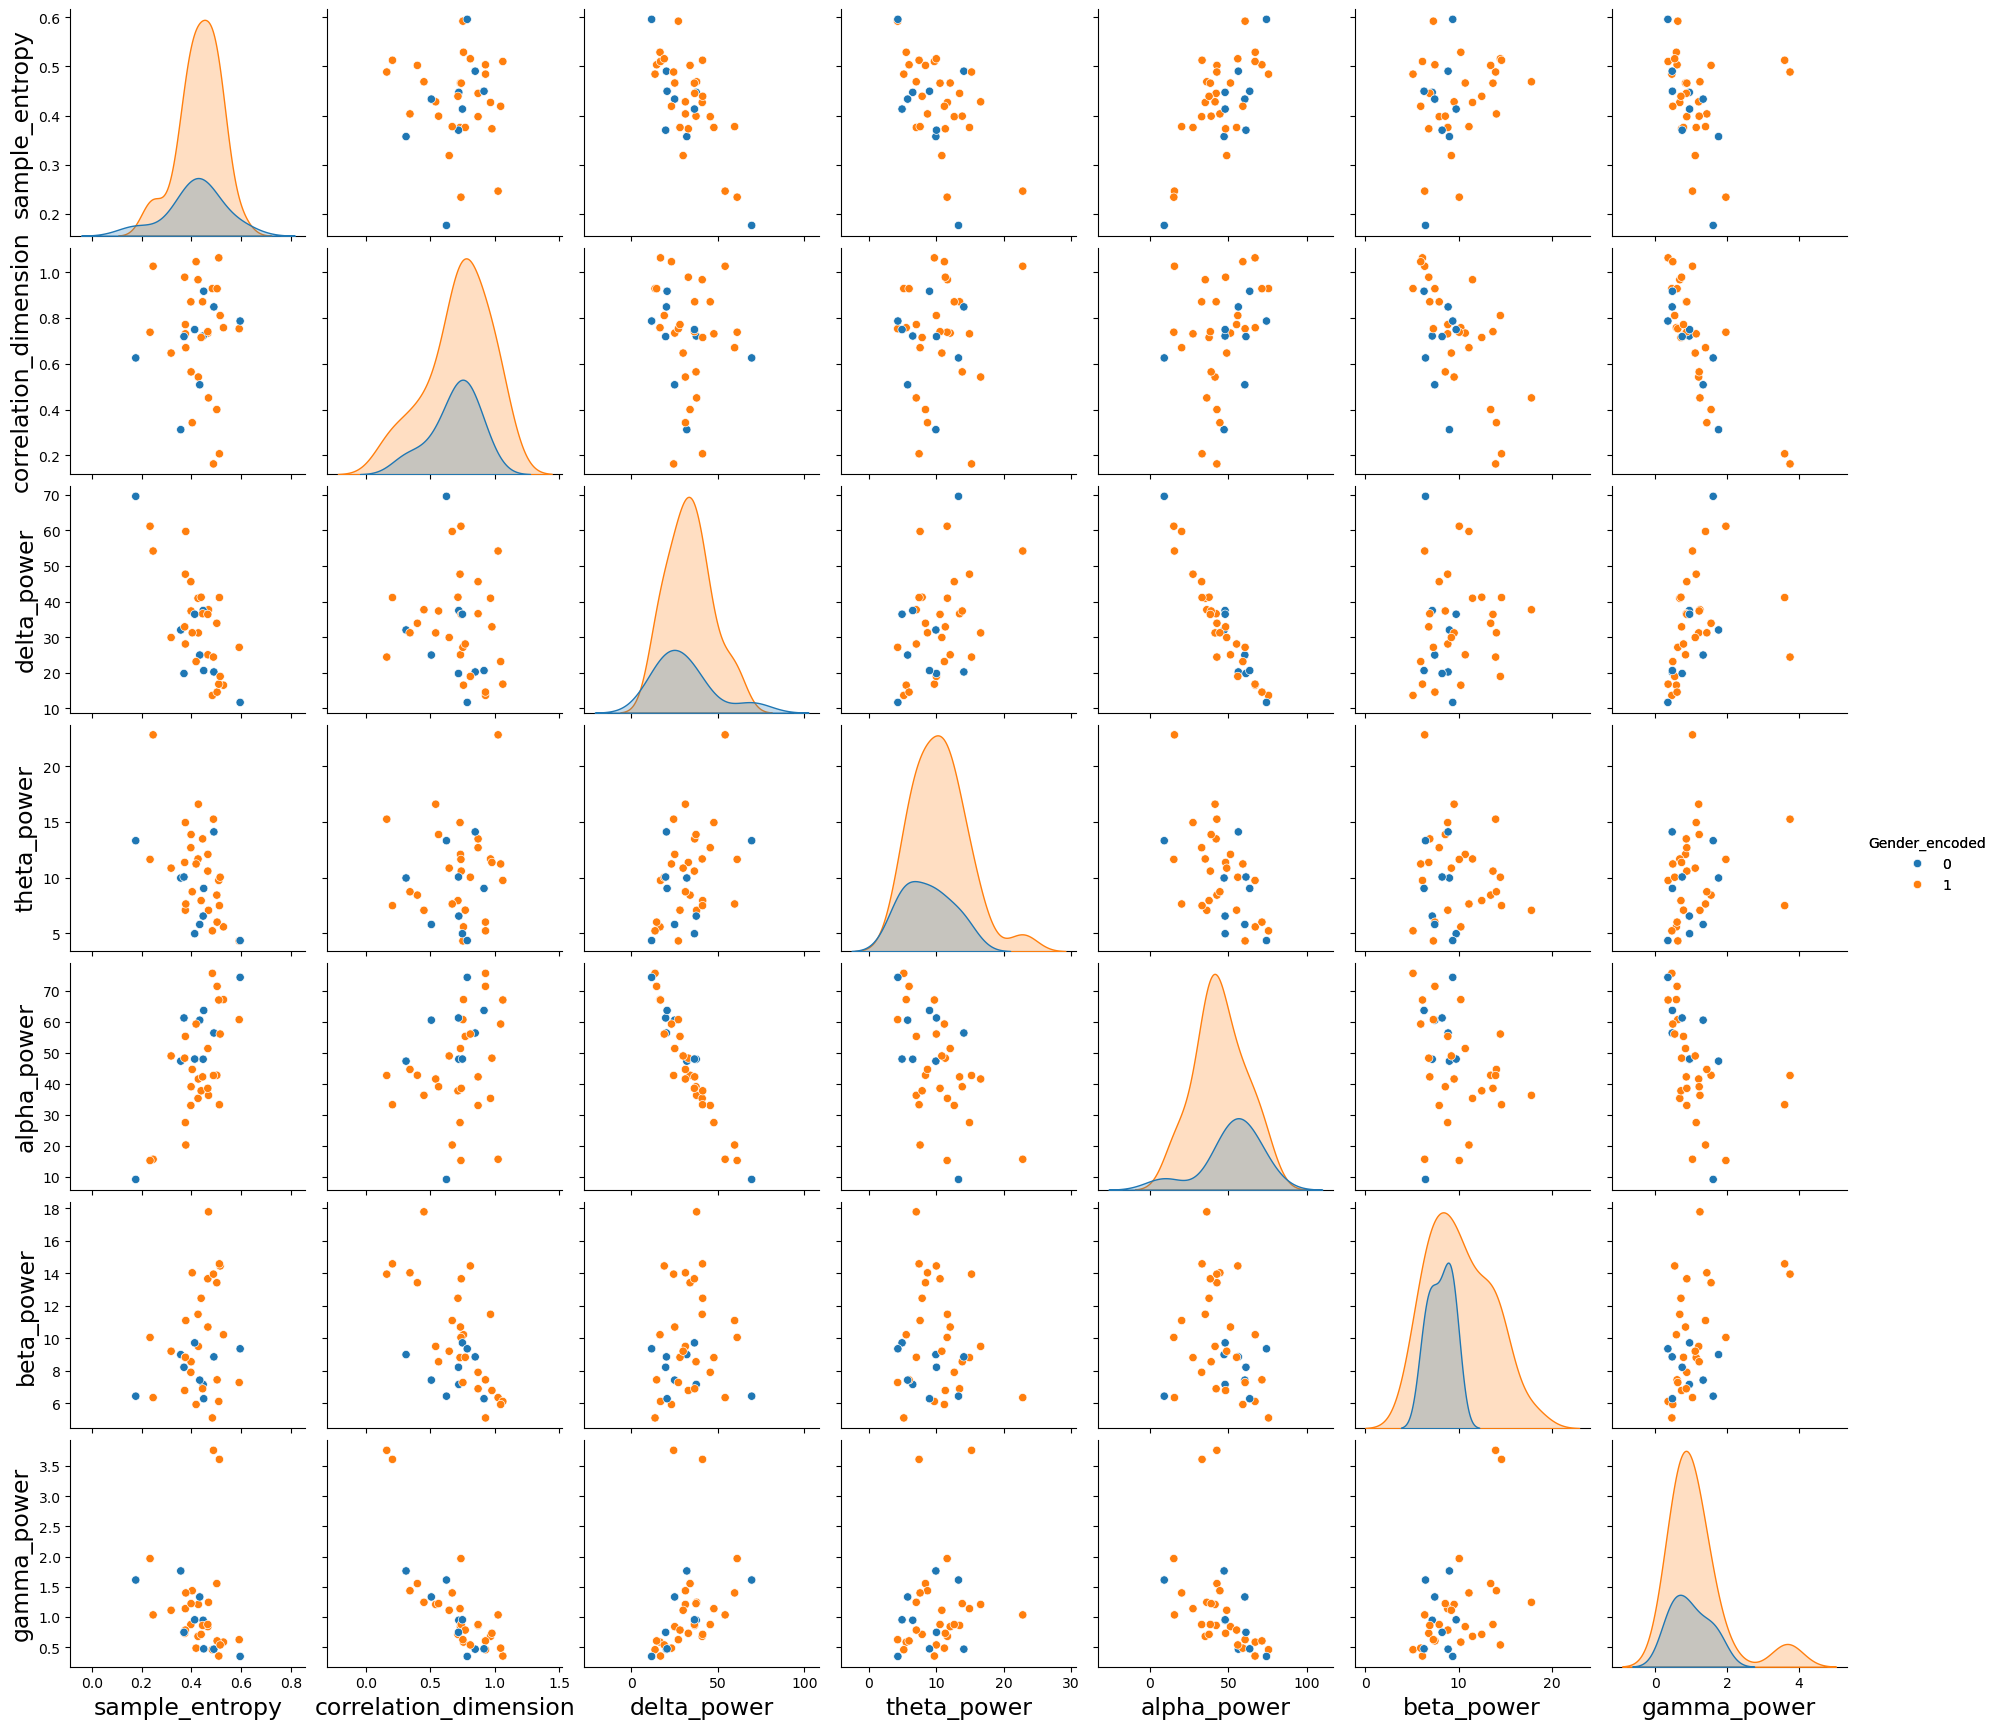

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot = sns.pairplot(features_before_gender, hue='Gender_encoded')

for ax in pairplot.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=17)
        ax.set_ylabel(ax.get_ylabel(), fontsize=17)


pairplot.add_legend()

plt.savefig("pairplot_before.png", dpi=300, bbox_inches='tight')  # Save figure

plt.show()


## Box plots gender BEFORE

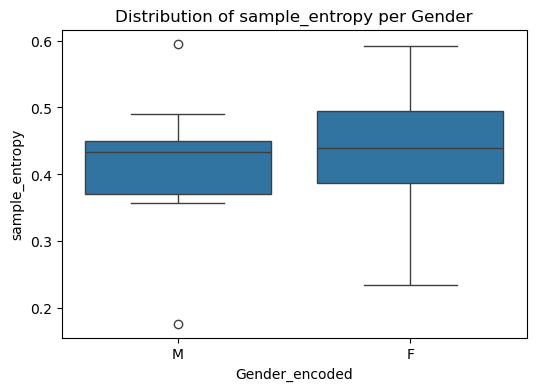

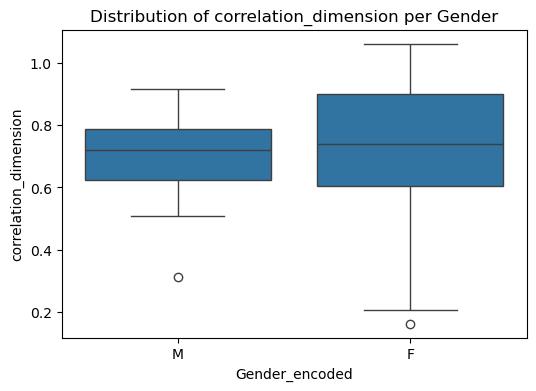

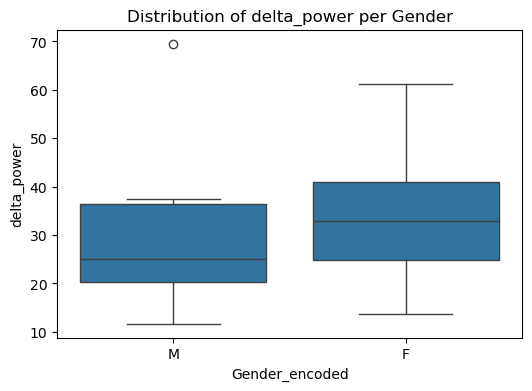

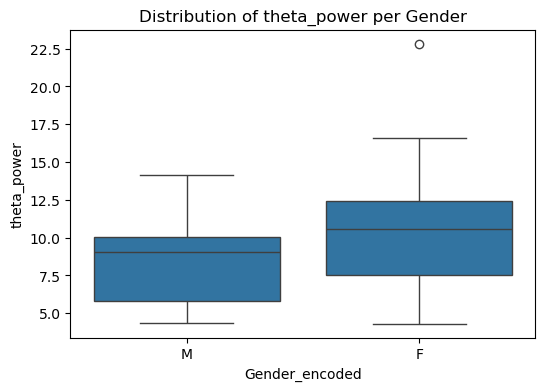

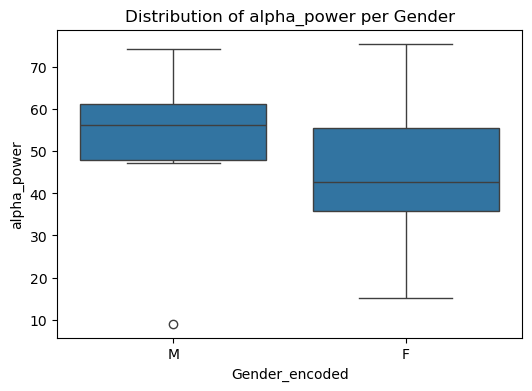

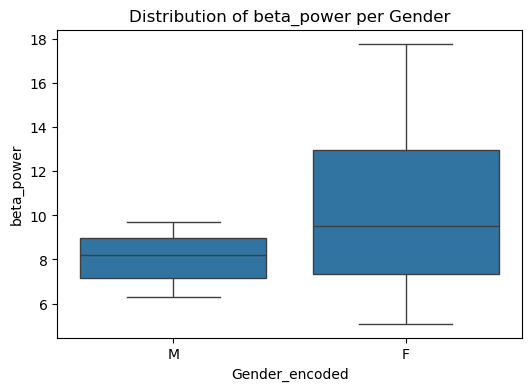

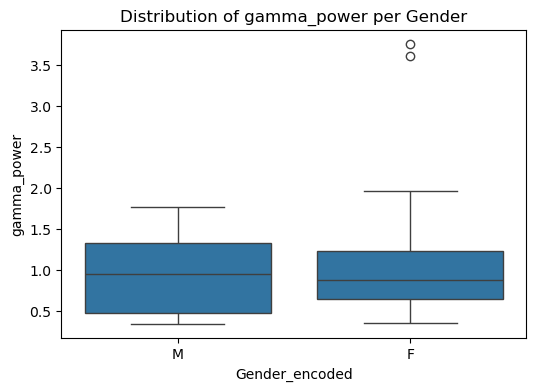

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = features_before_gender.select_dtypes(include=['number']).columns.drop('Gender_encoded')

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=features_before_gender['Gender_encoded'], y=features_before_gender[col])
    plt.xticks(ticks=[0, 1], labels=['M', 'F'])  
    plt.title(f'Distribution of {col} per Gender BEFORE')
    plt.show()


## Statistical tests for gender BEFORE

In [23]:
from scipy.stats import mannwhitneyu, shapiro, ttest_ind

columns = features_before_gender.select_dtypes(include=['number']).columns.drop('Gender_encoded')

for col in columns:
    group_m = features_before_gender[features_before_gender['Gender_encoded'] == 0][col]
    group_f = features_before_gender[features_before_gender['Gender_encoded'] == 1][col]

    # Shapiro-Wilk normality test
    stat_m, p_m = shapiro(group_m)
    stat_f, p_f = shapiro(group_f)

    print(f'\n{col}:')
    print(f'  Shapiro-Wilk (Males): stat = {stat_m:.3f}, p = {p_m:.4f}')
    print(f'  Shapiro-Wilk (Females): stat = {stat_f:.3f}, p = {p_f:.4f}')

    if p_m > 0.05 and p_f > 0.05:
        print("  Both distributions appear normal → Independent t-test")
        
        stat, p = ttest_ind(group_m, group_f)
        if p < 0.05:
            print("There is a significant difference between the groups, p-value: ", p, "stat: ", stat)
        else:
            print("There is NOT enough evidence of a significant difference, p-value: ", p, "stat: ", stat)
    
    else:
        print("  At least one group is non-normal → Mann-Whitney U test")
    
        stat, p = mannwhitneyu(group_m, group_f)
        if p < 0.05:
            print("There is a significant difference between the groups, p-value: ", p, "stat: ", stat)
        else:
            print("There is NOT enough evidence of a significant difference, p-value: ", p, "stat: ", stat)
    


sample_entropy:
  Shapiro-Wilk (Males): stat = 0.925, p = 0.4359
  Shapiro-Wilk (Females): stat = 0.951, p = 0.2307
  Both distributions appear normal → Independent t-test
There is NOT enough evidence of a significant difference, p-value:  0.6020647613748711 stat:  -0.5263460709273399

correlation_dimension:
  Shapiro-Wilk (Males): stat = 0.926, p = 0.4458
  Shapiro-Wilk (Females): stat = 0.937, p = 0.1040
  Both distributions appear normal → Independent t-test
There is NOT enough evidence of a significant difference, p-value:  0.7249038107108896 stat:  -0.35483638798060946

delta_power:
  Shapiro-Wilk (Males): stat = 0.841, p = 0.0588
  Shapiro-Wilk (Females): stat = 0.964, p = 0.4593
  Both distributions appear normal → Independent t-test
There is NOT enough evidence of a significant difference, p-value:  0.5455431288140227 stat:  -0.6105719842563349

theta_power:
  Shapiro-Wilk (Males): stat = 0.925, p = 0.4386
  Shapiro-Wilk (Females): stat = 0.944, p = 0.1547
  Both distributions

# FEATURES DURING vector

In [28]:
import pickle
import pandas as pd

# Load the sample entropy and correlation dimension from a pickle file
with open("sample_during_results.pkl", 'rb') as f:
    sample_during = pickle.load(f)


with open("correlation_dimension_during.pkl", 'rb') as f:
    correlation_during = pickle.load(f)


during_df = pd.read_csv("power_O2_during.csv")

# Create lists to store the characteristics of each individual
features2 = []

num_individuals = len(sample_during)

for i in range(num_individuals):
    # Create a dictionary to store the individual's features
    individual_features = {}
    
    individual_features['sample_entropy'] = sample_during[i]
    individual_features['correlation_dimension'] = correlation_during[i]
    
    delta_power = during_df[(during_df['Patient'] == (i + 1)) & (during_df['Band'] == 'delta')]['Power During'].values
    theta_power = during_df[(during_df['Patient'] == (i + 1)) & (during_df['Band'] == 'theta')]['Power During'].values
    alpha_power = during_df[(during_df['Patient'] == (i + 1)) & (during_df['Band'] == 'alpha')]['Power During'].values
    beta_power = during_df[(during_df['Patient'] == (i + 1)) & (during_df['Band'] == 'beta')]['Power During'].values
    gamma_power = during_df[(during_df['Patient'] == (i + 1)) & (during_df['Band'] == 'gamma')]['Power During'].values

    individual_features['delta_power'] = delta_power[0]
    individual_features['theta_power'] = theta_power[0]
    individual_features['alpha_power'] = alpha_power[0]
    individual_features['beta_power'] = beta_power[0]
    individual_features['gamma_power'] = gamma_power[0]
    
    features2.append(individual_features)

features_during = pd.DataFrame(features2)
print(features_during.head())

   sample_entropy  correlation_dimension  delta_power  theta_power  \
0        0.487338               0.597954    15.879090     5.539176   
1        0.455041               0.709481    93.734385     2.413264   
2        0.510557               0.170929    27.969408     5.227559   
3        0.365529               0.770192    39.818555    12.842784   
4        0.448269               0.636796    42.465827    11.480360   

   alpha_power  beta_power  gamma_power  
0    66.092667   11.586037     0.903031  
1     2.268351    1.355363     0.228636  
2    42.051027   22.262783     2.489223  
3    32.019499   14.156692     1.162470  
4    26.410610   18.887349     0.755853  


# UMAP DURING

C:\Users\pablo\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


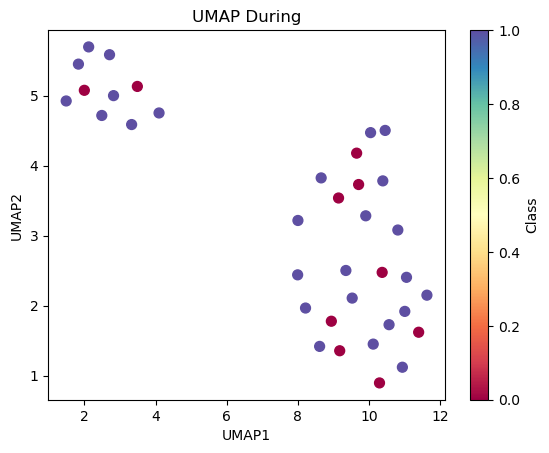

In [31]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = features_during.values
y = results

scaler = StandardScaler() 
X_normalized = scaler.fit_transform(X)

reducer = umap.UMAP(n_neighbors=9, min_dist=0.3,n_components=2, random_state=42)

# Fit and transform the data
X_umap = reducer.fit_transform(X_normalized)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=50)
plt.title('UMAP During')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Class')
plt.savefig("UMAP_during.png", dpi=300)  # Save figure
plt.show()

## FEATURES DURING + GENDER vector

In [35]:
info = pd.read_csv("subject-info.csv")

info['Gender_encoded'] = info['Gender'].apply(lambda x: 1 if x == 'F' else 0)

new = info['Gender_encoded']

features_during_gender = pd.merge(features_during, new, left_index=True, right_index=True, how='left')

print(features_during_gender.head())

   sample_entropy  correlation_dimension  delta_power  theta_power  \
0        0.487338               0.597954    15.879090     5.539176   
1        0.455041               0.709481    93.734385     2.413264   
2        0.510557               0.170929    27.969408     5.227559   
3        0.365529               0.770192    39.818555    12.842784   
4        0.448269               0.636796    42.465827    11.480360   

   alpha_power  beta_power  gamma_power  Gender_encoded  
0    66.092667   11.586037     0.903031               1  
1     2.268351    1.355363     0.228636               1  
2    42.051027   22.262783     2.489223               1  
3    32.019499   14.156692     1.162470               1  
4    26.410610   18.887349     0.755853               1  


## Pairplot gender DURING

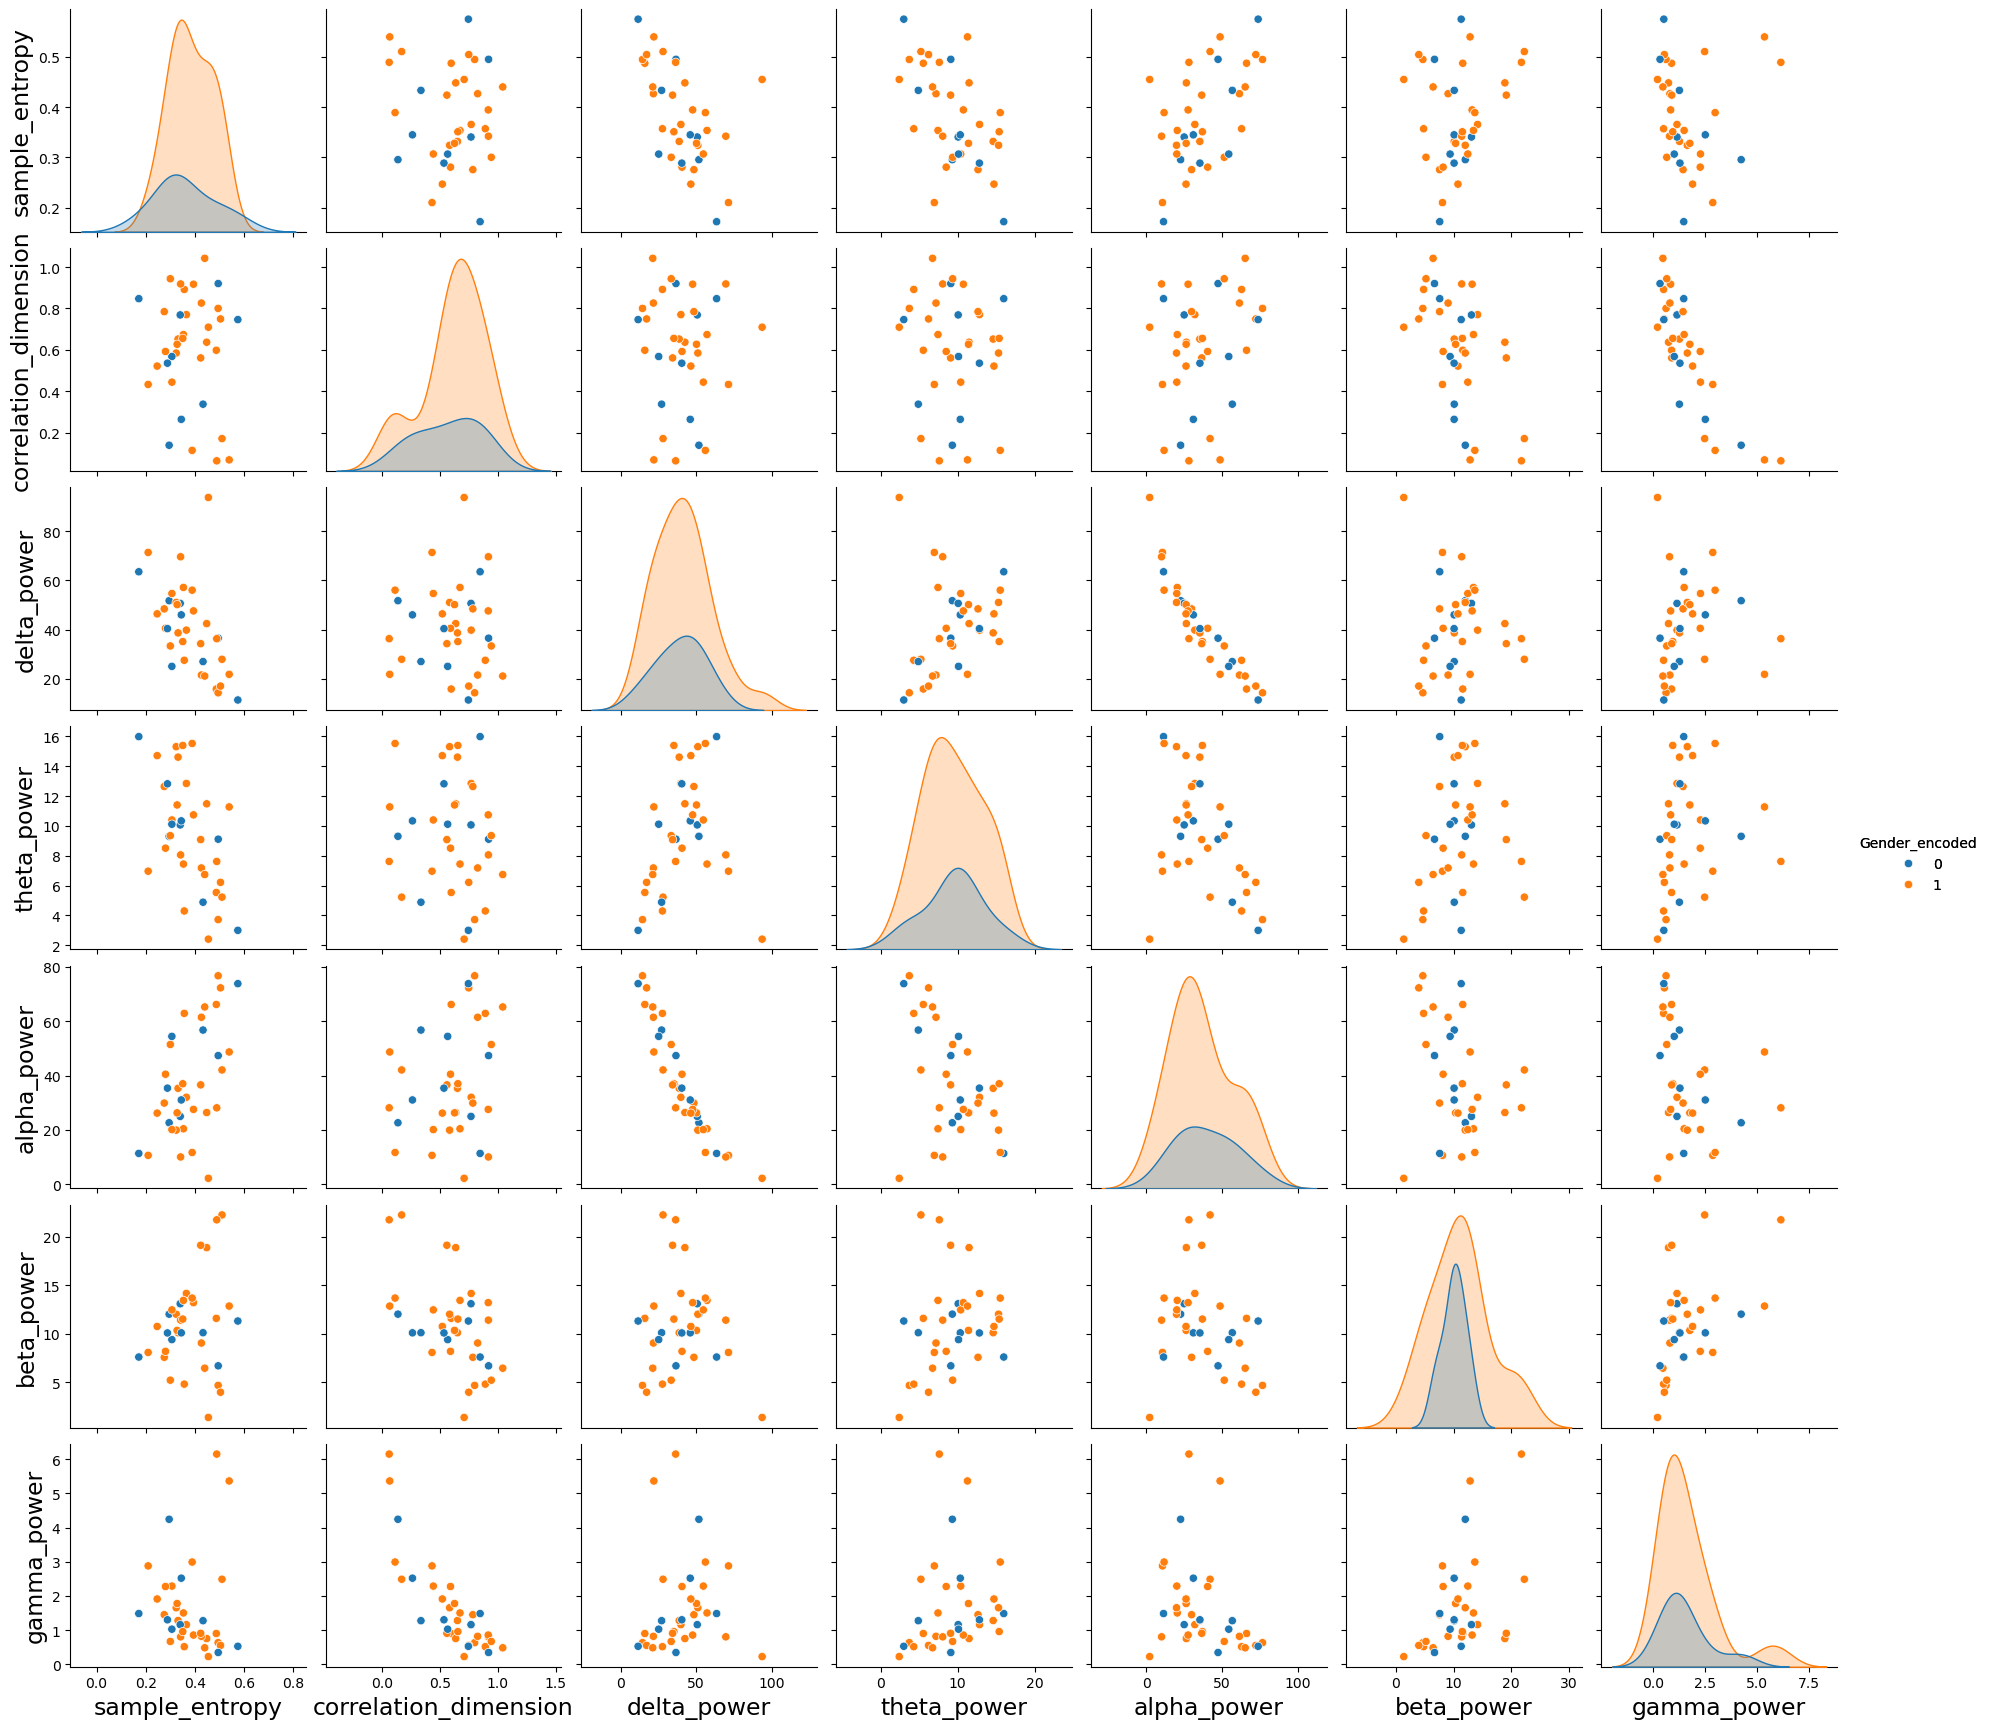

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot = sns.pairplot(features_during_gender, hue='Gender_encoded')

for ax in pairplot.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=17)
        ax.set_ylabel(ax.get_ylabel(), fontsize=17)


pairplot.add_legend()

plt.savefig("pairplot_during.png", dpi=300, bbox_inches='tight')  # Save figure

plt.show()

## Box plots gender DURING

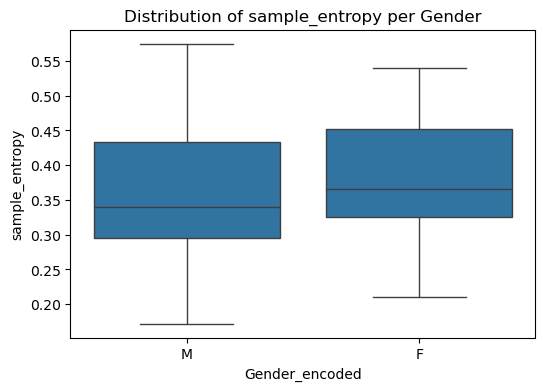

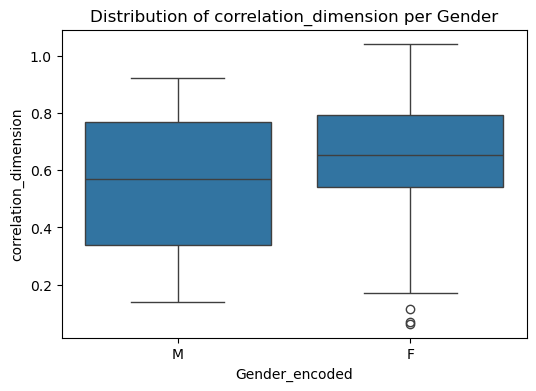

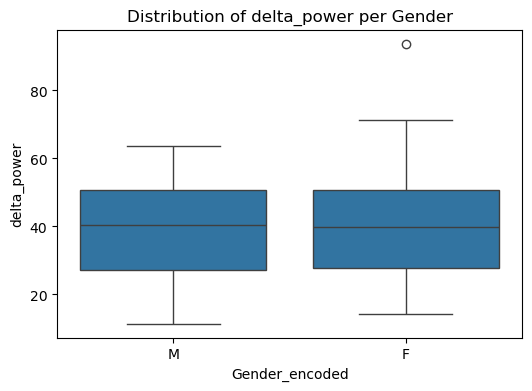

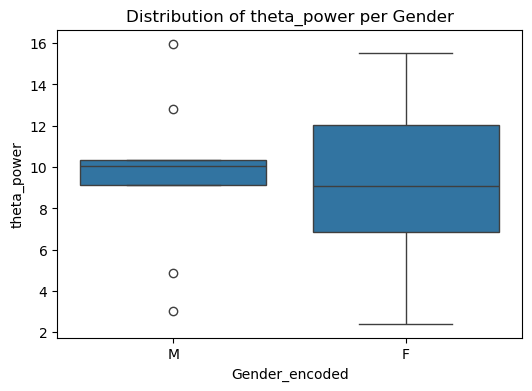

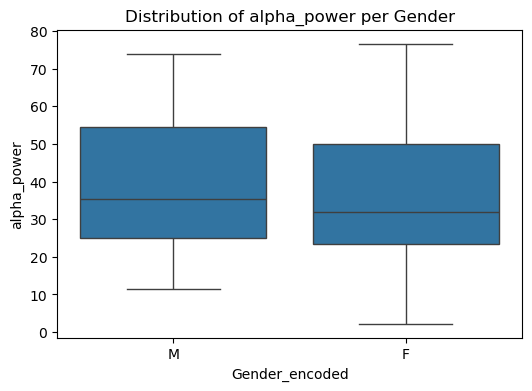

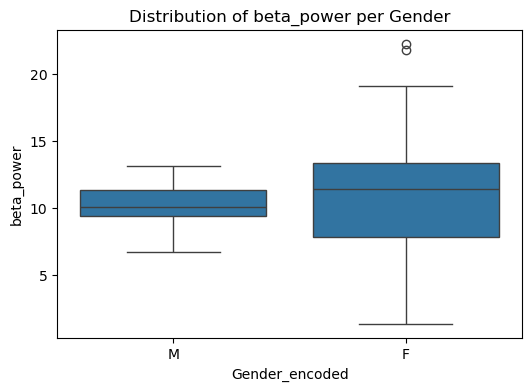

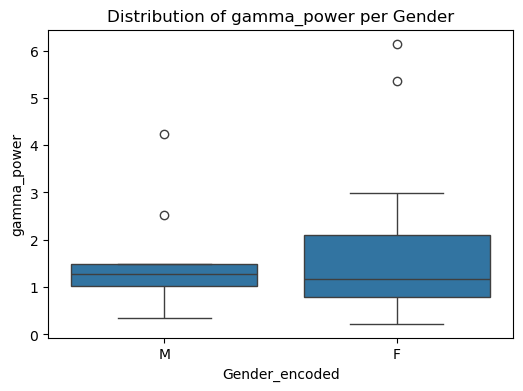

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = features_during_gender.select_dtypes(include=['number']).columns.drop('Gender_encoded')

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=features_during_gender['Gender_encoded'], y=features_during_gender[col])
    plt.xticks(ticks=[0, 1], labels=['M', 'F'])  
    plt.title(f'Distribution of {col} per Gender')
    plt.show()

## Statistical tests for gender DURING

In [33]:
from scipy.stats import mannwhitneyu

columns = features_during_gender.select_dtypes(include=['number']).columns.drop('Gender_encoded')


for col in columns:
    group_m = features_during_gender[features_during_gender['Gender_encoded'] == 0][col]
    group_f = features_during_gender[features_during_gender['Gender_encoded'] == 1][col]
    
    # Shapiro-Wilk normality test
    stat_m, p_m = shapiro(group_m)
    stat_f, p_f = shapiro(group_f)

    print(f'\n{col}:')
    print(f'  Shapiro-Wilk (Males): stat = {stat_m:.3f}, p = {p_m:.4f}')
    print(f'  Shapiro-Wilk (Females): stat = {stat_f:.3f}, p = {p_f:.4f}')

    if p_m > 0.05 and p_f > 0.05:
        print("  Both distributions appear normal → Independent t-test")
        
        stat, p = ttest_ind(group_m, group_f)
        if p < 0.05:
            print("There is a significant difference between the groups, p-value: ", p, "stat: ", stat)
        else:
            print("There is NOT enough evidence of a significant difference, p-value: ", p, "stat: ", stat)
    
    else:
        print("  At least one group is non-normal → Mann-Whitney U test")
    
        stat, p = mannwhitneyu(group_m, group_f)
        if p < 0.05:
            print("There is a significant difference between the groups, p-value: ", p, "stat: ", stat)
        else:
            print("There is NOT enough evidence of a significant difference, p-value: ", p, "stat: ", stat)


sample_entropy:
  Shapiro-Wilk (Males): stat = 0.953, p = 0.7195
  Shapiro-Wilk (Females): stat = 0.971, p = 0.6391
  Both distributions appear normal → Independent t-test
There is NOT enough evidence of a significant difference, p-value:  0.5423231984921622 stat:  -0.6154996996647635

correlation_dimension:
  Shapiro-Wilk (Males): stat = 0.941, p = 0.5974
  Shapiro-Wilk (Females): stat = 0.919, p = 0.0365
  At least one group is non-normal → Mann-Whitney U test
There is NOT enough evidence of a significant difference, p-value:  0.6348365769902251 stat:  108.0

delta_power:
  Shapiro-Wilk (Males): stat = 0.981, p = 0.9709
  Shapiro-Wilk (Females): stat = 0.950, p = 0.2141
  Both distributions appear normal → Independent t-test
There is NOT enough evidence of a significant difference, p-value:  0.7637985060474479 stat:  -0.3029173749181933

theta_power:
  Shapiro-Wilk (Males): stat = 0.939, p = 0.5748
  Shapiro-Wilk (Females): stat = 0.961, p = 0.3896
  Both distributions appear normal

# DISTRIBUTION of GENDER by COUNT QUALITY

## FEATURES + GENDER + COUNT QUALITY

In [59]:
info = pd.read_csv("subject-info.csv")

info['Gender_encoded'] = info['Gender'].apply(lambda x: 1 if x == 'F' else 0)

new = info[['Gender_encoded', 'Count quality']]

features_performance = pd.merge(features_before, new, left_index=True, right_index=True, how='left')

print(features_performance.head())

   sample_entropy  correlation_dimension  delta_power  theta_power  \
0        0.528557               0.757331    16.539006     5.573255   
1        0.468592               0.450983    37.717432     7.058383   
2        0.501875               0.400095    33.920699     8.425827   
3        0.466064               0.733875    25.074880    12.086988   
4        0.426544               0.966698    40.950820    11.675281   

   alpha_power  beta_power  gamma_power  Gender_encoded  Count quality  
0    67.085880   10.217711     0.584148               1              0  
1    36.201181   17.780124     1.242880               1              1  
2    42.682292   13.417670     1.553511               1              1  
3    51.306723   10.691358     0.840050               1              1  
4    35.221479   11.472998     0.679421               1              0  


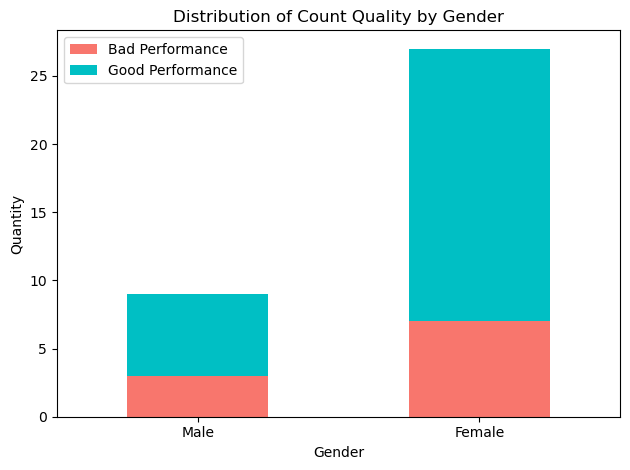

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

count = pd.crosstab(features_performance["Gender_encoded"], features_performance["Count quality"])

count.index = ["Male", "Female"]
count.columns = ["Bad Performance", "Good Performance"]

count.plot(kind="bar", stacked=True, color=["#f8766d", "#00bfc4"])
plt.title("Distribution of Count Quality by Gender")
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("distribution_count.png", dpi=300)  # Save figure
plt.show()

### Proportion

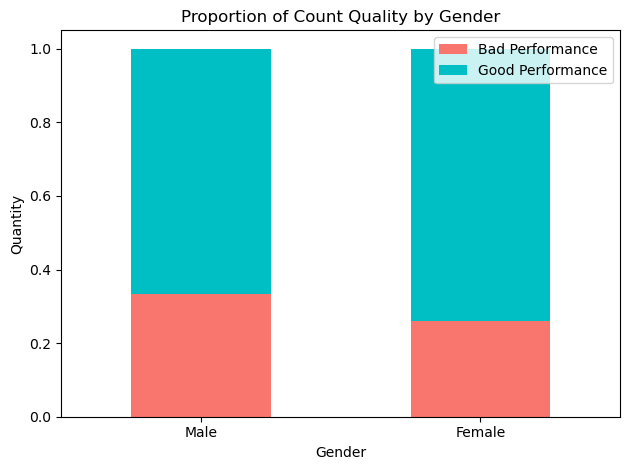

In [68]:
proportions = count.div(count.sum(axis=1), axis=0)

proportions.plot(kind="bar", stacked=True, color=["#f8766d", "#00bfc4"])
plt.title("Proportion of Count Quality by Gender")
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("proportion_count.png", dpi=300)  # Save figure

plt.show()
